In [1]:
# Sales Data Analysis 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 6)

filepath = r"C:\Users\Ahana\Desktop\Customer-Sales-Analysis\data\sales_data.csv"

# Loading the data
print("=" * 80)
print("Loading Sales Data")
print("=" * 80)

df = pd.read_csv(filepath)
print("Data loaded successfully!")
print(f"Shape: {df.shape[0]} rows × {df.shape[1]} columns\n")

# Initial Inspection
print("=" * 80)
print("Initial Data Inspection")
print("=" * 80)

print("\n1. First Few Rows:")
print("-" * 80)
display(df.head(10))

print("\n2. Data Info:")
print("-" * 80)
df.info()

print("\n3. Statistical Summary:")
print("-" * 80)
display(df.describe())

print("\n4. Column Names:")
print("-" * 80)
for idx, col in enumerate(df.columns, 1):
    print(f"{idx}. {col}")

# Data Quality Assessment 
print("\n" + "=" * 80)
print("Data Quality Assessment")
print("=" * 80)

# Missing values
print("\n1. Missing Values:")
print("-" * 80)
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing_Count': missing,
    'Percentage': missing_pct
})
missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

if len(missing_df) > 0:
    display(missing_df)
else:
    print("No missing values have been found!")

# Duplicates
print("\n2. Duplicate Rows:")
print("-" * 80)
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Data Cleaning 

cleaned_df = df.copy()

# Removing duplicates
if duplicates > 0:
    print(f"Removing {duplicates} duplicate rows")
    cleaned_df = cleaned_df.drop_duplicates()

# Drop the first unnamed index column if it exists
if cleaned_df.columns[0] == 'Unnamed: 0' or cleaned_df.columns[0] == '':
    print("Removing unnecessary index column")
    cleaned_df = cleaned_df.iloc[:, 1:]

# Converting Date_of_Sale to datetime if present
if 'Date_of_Sale' in cleaned_df.columns:
    try:
        print("Converting Date_of_Sale to datetime")
        cleaned_df['Date_of_Sale'] = pd.to_datetime(
            cleaned_df['Date_of_Sale'],
            errors='coerce'
        )
        print("  - Converted to datetime format")
    except:
        print("  - Could not convert Date_of_Sale to datetime")

# Handling missing values
if len(missing_df) > 0:
    print("Handling missing values")
    
    for col in missing_df.index:
        if col in cleaned_df.columns:
            if cleaned_df[col].dtype in ['float64', 'int64']:
                cleaned_df[col].fillna(cleaned_df[col].median(), inplace=True)
                print(f"  - Filled {col} with median")
            else:
                if len(cleaned_df[col].mode()) > 0:
                    cleaned_df[col].fillna(cleaned_df[col].mode()[0], inplace=True)
                    print(f"  - Filled {col} with mode")

print(f"Cleaned data shape: {cleaned_df.shape[0]} rows × {cleaned_df.shape[1]} columns")

# Identify Feature Types

numerical_cols = cleaned_df.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_cols = cleaned_df.select_dtypes(include=['object']).columns.tolist()

print(f"\nNumerical Columns ({len(numerical_cols)}):")
for col in numerical_cols:
    print(f"  - {col}")

print(f"\nCategorical Columns ({len(categorical_cols)}):")
for col in categorical_cols:
    print(f"  - {col}")

# Summary Stats

print(f"""
Sales Data Analysis - Summary Report
Generated: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}

1. Dataset Overview 
   - Total Records: {cleaned_df.shape[0]:,}
   - Total Features: {cleaned_df.shape[1]}
   - Memory Usage: {cleaned_df.memory_usage(deep=True).sum() / 1024**2:.2f} MB

2. Data Quality
   - Duplicate Rows Removed: {duplicates}
   - Missing Values Handled: {len(missing_df) > 0}

3. Feature Types 
   - Numerical Features: {len(numerical_cols)}
   - Categorical Features: {len(categorical_cols)}

4. Sales Performance 
""")

# Sales insights
if 'Sales_Amount' in cleaned_df.columns:
    print(f"   Revenue Statistics:")
    print(f"   - Total Revenue: ${cleaned_df['Sales_Amount'].sum():,.2f}")
    print(f"   - Average Sale: ${cleaned_df['Sales_Amount'].mean():.2f}")
    print(f"   - Total Transactions: {len(cleaned_df):,}")

# Discount insights
if 'Discount' in cleaned_df.columns:
    print(f"\n   Discount Statistics:")
    print(f"   - Total Discounts: ${cleaned_df['Discount'].sum():,.2f}")
    print(f"   - Average Discount: ${cleaned_df['Discount'].mean():.2f}")
    print(f"   - Discount Rate: {(cleaned_df['Discount'].sum() / cleaned_df['Sales_Amount'].sum()) * 100:.2f}%")

# Category insights
if 'Product_Category' in cleaned_df.columns:
    print(f"\n   Product Categories:")
    print(f"   - Total Categories: {cleaned_df['Product_Category'].nunique()}")
    top_category = cleaned_df.groupby('Product_Category')['Sales_Amount'].sum().idxmax()
    top_category_sales = cleaned_df.groupby('Product_Category')['Sales_Amount'].sum().max()
    print(f"   - Top Category: {top_category} (${top_category_sales:,.2f})")

# Customer insights
if 'Customer_Age' in cleaned_df.columns:
    print(f"\n   Customer Demographics:")
    print(f"   - Average Customer Age: {cleaned_df['Customer_Age'].mean():.1f} years")
    print(f"   - Age Range: {cleaned_df['Customer_Age'].min():.0f}-{cleaned_df['Customer_Age'].max():.0f} years")

# Time insights
if 'Date_of_Sale' in cleaned_df.columns:
    print(f"\n   Time Period:")
    print(f"   - Date Range: {cleaned_df['Date_of_Sale'].min().date()} to {cleaned_df['Date_of_Sale'].max().date()}")
    print(f"   - Number of Days: {(cleaned_df['Date_of_Sale'].max() - cleaned_df['Date_of_Sale'].min()).days} days")

# Save the cleaned dataframe
output_path = r"C:\Users\Ahana\Desktop\Customer-Sales-Analysis\data\cleaned_sales_data.csv"
cleaned_df.to_csv(output_path, index=False)
print(f"Cleaned data saved to: {output_path}")


Loading Sales Data
Data loaded successfully!
Shape: 100000 rows × 10 columns

Initial Data Inspection

1. First Few Rows:
--------------------------------------------------------------------------------


,Unnamed: 0,Sales_ID,Product_Category,Sales_Amount,Discount,Sales_Region,Date_of_Sale,Customer_Age,Customer_Gender,Sales_Representative
0,0,efc35a5f-e48c-4803-9f6d-ef32a60e1367,Movies,341.05,45.98,East Dianeport,2024-07-12,69.0,Male,Bruce Rodriguez
1,1,92a86e42-de42-4e0d-89f3-bbb0b7f354bd,Pet Supplies,594.71,29.59,North Linda,2024-05-07,32.0,Other,Patricia Pugh
2,2,1fbbdc48-f405-48f3-8274-750581552d26,Outdoor,351.90,49.78,Lake Josephmouth,2024-05-11,28.0,Other,Kevin Fuentes
3,3,1f329e7a-13f0-4518-9eeb-84815301d64c,Electronics,NaN,NaN,North Martinside,2024-09-02,NaN,NaN,Evelyn Price
4,4,6ef559dc-3e68-4009-9845-4bab54d897c6,Books,795.75,27.21,Michealshire,2024-05-02,21.0,Other,Joseph Chavez
5,5,280065cd-ad2b-4c80-9fce-929da484ee06,Books,526.17,28.54,Joelmouth,2024-01-02,61.0,Female,Tyler Graves
6,6,4e12ef04-c5e1-4d54-8107-dcd6d0efbb68,Automotive,393.04,0.27,Lake Ericashire,2024-06-28,31.0,Male,Mark Melendez
7,7,49f343a9-66c0-4fc5-88fc-f7b3871a9963,Office Supplies,843.07,44.72,South Lauren,2024-06-23,45.0,Male,Diane Mills
8,8,6260b59d-c81d-409b-ac57-9daf5900c6aa,DIY,668.55,31.97,East Julie,2024-02-18,60.0,Male,Vanessa Moore
9,9,733e3b9a-d4f6-43c3-9fe9-0928906319d6,Outdoor,251.14,14.09,South Brandon,2024-05-06,64.0,Female,Sarah Martin



2. Data Info:
--------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            100000 non-null  int64  
 1   Sales_ID              100000 non-null  object 
 2   Product_Category      100000 non-null  object 
 3   Sales_Amount          90000 non-null   float64
 4   Discount              90000 non-null   float64
 5   Sales_Region          100000 non-null  object 
 6   Date_of_Sale          100000 non-null  object 
 7   Customer_Age          90000 non-null   float64
 8   Customer_Gender       90000 non-null   object 
 9   Sales_Representative  100000 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 7.6+ MB

3. Statistical Summary:
--------------------------------------------------------------------------------


,Unnamed: 0,Sales_Amount,Discount,Customer_Age
count,100000.000000,90000.000000,90000.000000,90000.000000
mean,49999.500000,550.170806,24.913682,43.532544
std,28867.657797,260.134483,14.438750,15.008287
min,0.000000,100.010000,0.000000,18.000000
25%,24999.750000,324.970000,12.400000,30.000000
50%,49999.500000,550.095000,24.890000,44.000000
75%,74999.250000,776.020000,37.390000,57.000000
max,99999.000000,1000.000000,50.000000,69.000000



4. Column Names:
--------------------------------------------------------------------------------
1. Unnamed: 0
2. Sales_ID
3. Product_Category
4. Sales_Amount
5. Discount
6. Sales_Region
7. Date_of_Sale
8. Customer_Age
9. Customer_Gender
10. Sales_Representative

Data Quality Assessment

1. Missing Values:
--------------------------------------------------------------------------------


,Missing_Count,Percentage
Sales_Amount,10000,10.0
Discount,10000,10.0
Customer_Age,10000,10.0
Customer_Gender,10000,10.0



2. Duplicate Rows:
--------------------------------------------------------------------------------
Number of duplicate rows: 0
Removing unnecessary index column
Converting Date_of_Sale to datetime
  - Converted to datetime format
Handling missing values
  - Filled Sales_Amount with median
  - Filled Discount with median
  - Filled Customer_Age with median
  - Filled Customer_Gender with mode
Cleaned data shape: 100000 rows × 9 columns

Numerical Columns (3):
  - Sales_Amount
  - Discount
  - Customer_Age

Categorical Columns (5):
  - Sales_ID
  - Product_Category
  - Sales_Region
  - Customer_Gender
  - Sales_Representative

Sales Data Analysis - Summary Report
Generated: 2026-02-16 13:12:41

1. Dataset Overview 
   - Total Records: 100,000
   - Total Features: 9
   - Memory Usage: 33.53 MB

2. Data Quality
   - Duplicate Rows Removed: 0
   - Missing Values Handled: True

3. Feature Types 
   - Numerical Features: 3
   - Categorical Features: 5

4. Sales Performance 

   Revenue Stat


1. Distribution Plots for Numerical Features
--------------------------------------------------------------------------------


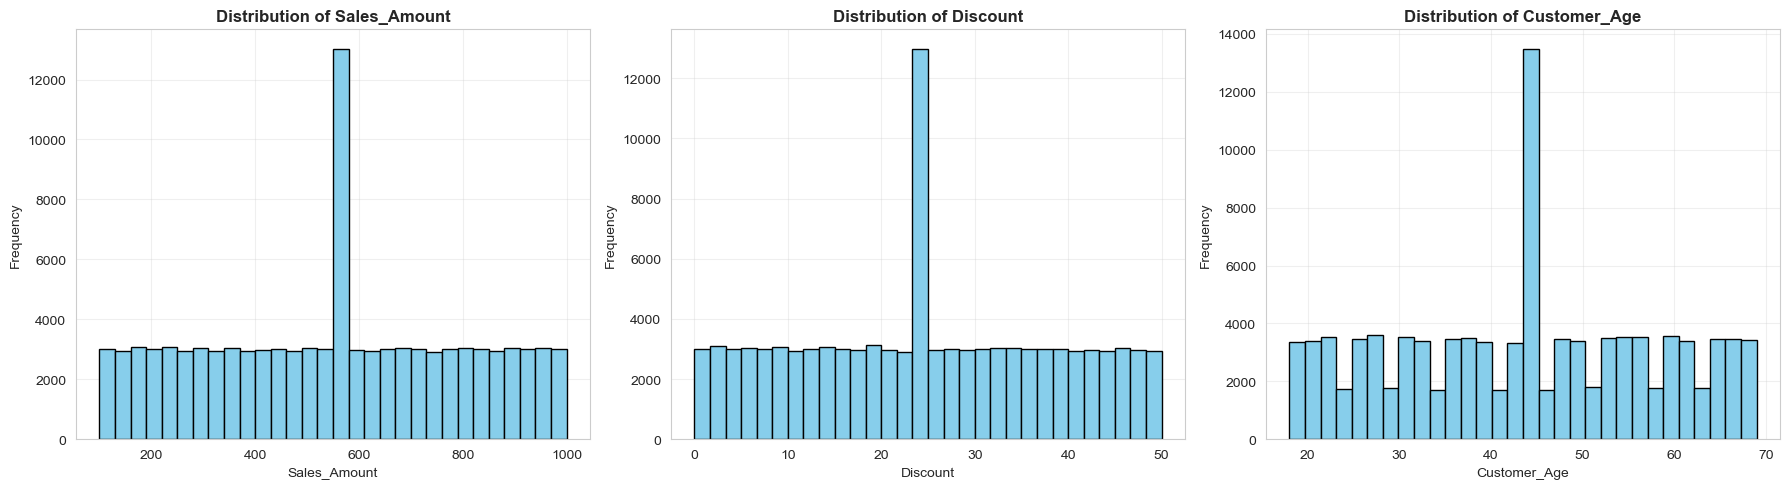

In [2]:
# Data Visualization 

# 1. Distribution of Numerical Features
if len(numerical_cols) > 0:
    print("\n1. Distribution Plots for Numerical Features")
    print("-" * 80)
    
    n_cols = min(3, len(numerical_cols))
    n_rows = (len(numerical_cols) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5*n_rows))
    if n_rows == 1:
        axes = [axes] if n_cols == 1 else axes
    else:
        axes = axes.flatten()
    
    for idx, col in enumerate(numerical_cols):
        if idx < len(axes):
            cleaned_df[col].hist(bins=30, ax=axes[idx], edgecolor='black', color='skyblue')
            axes[idx].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
            axes[idx].set_xlabel(col)
            axes[idx].set_ylabel('Frequency')
            axes[idx].grid(alpha=0.3)
    
    # Hide empty subplots
    for idx in range(len(numerical_cols), len(axes)):
        axes[idx].set_visible(False)
    
    plt.tight_layout()
    plt.show()


2. Correlation Heatmap
--------------------------------------------------------------------------------


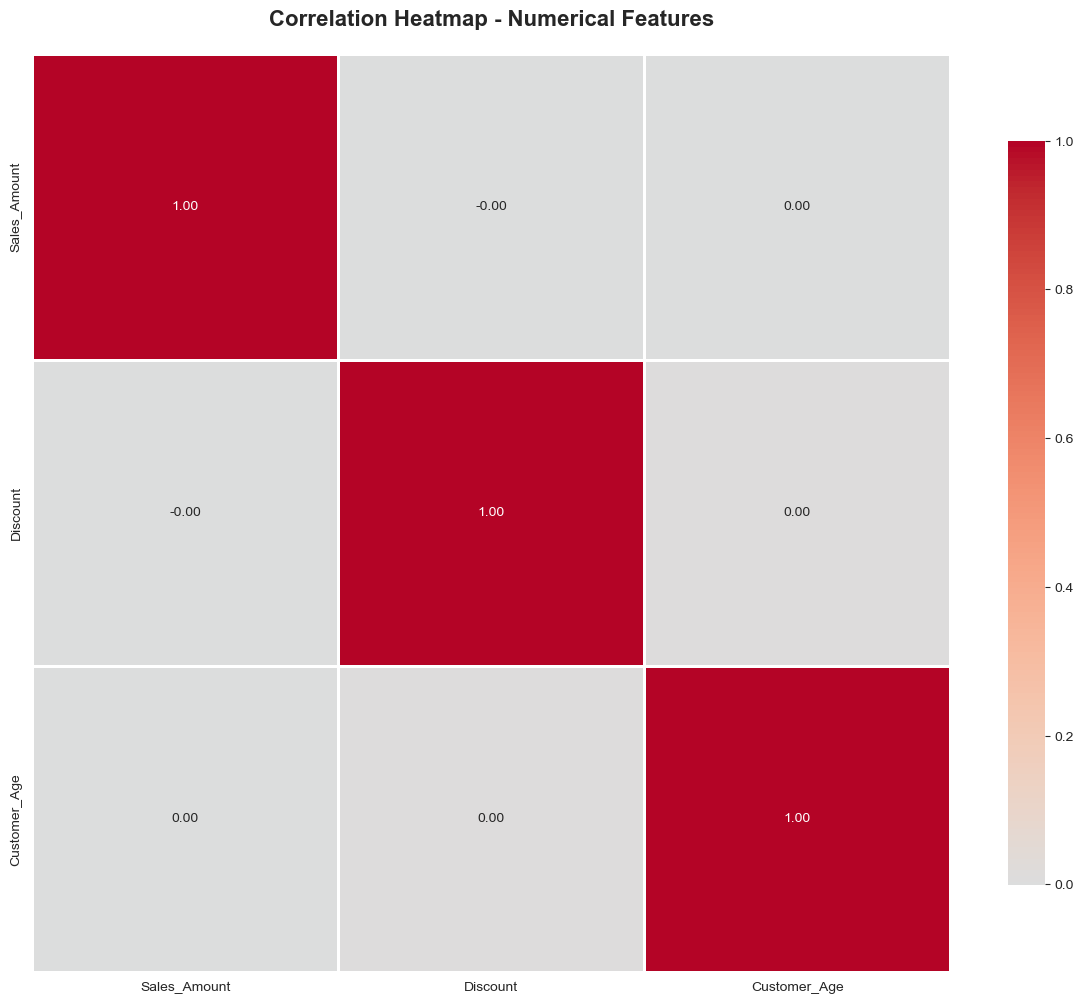

In [3]:
# 2. Correlation Heatmap
if len(numerical_cols) > 1:
    print("\n2. Correlation Heatmap")
    print("-" * 80)
    
    plt.figure(figsize=(12, 10))
    correlation_matrix = cleaned_df[numerical_cols].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
               fmt='.2f', square=True, linewidths=1, cbar_kws={"shrink": 0.8})
    plt.title('Correlation Heatmap - Numerical Features', fontsize=16, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.show()


3. Sales Amount Analysis
--------------------------------------------------------------------------------


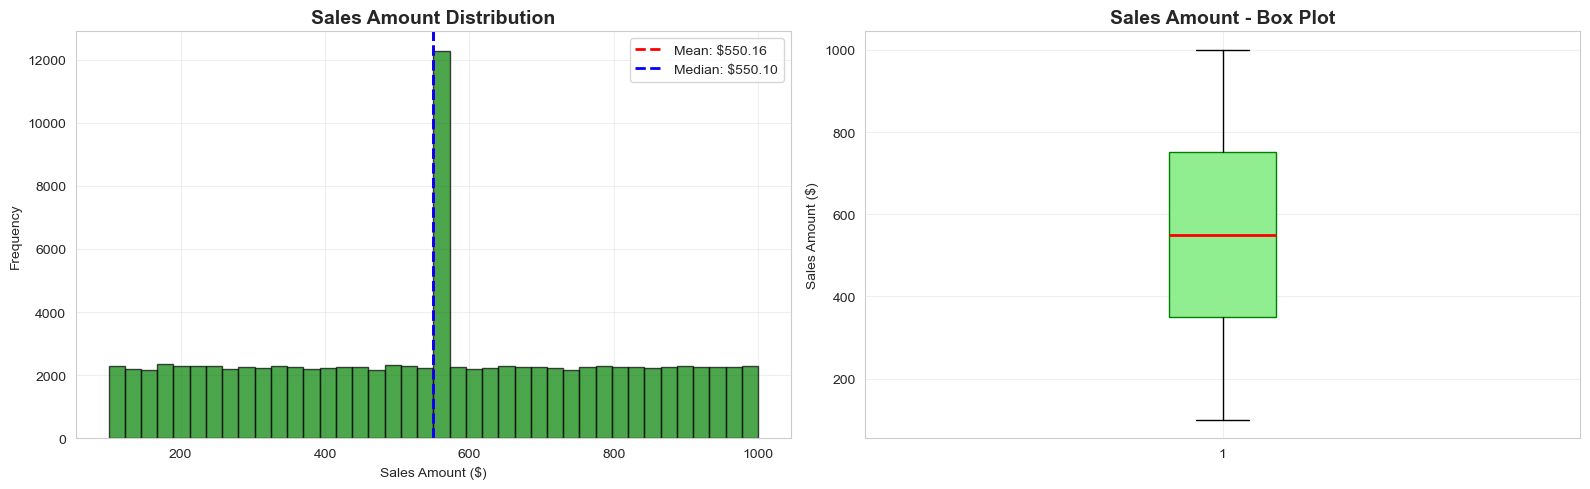


Sales Amount Statistics:
  - Mean: $550.16
  - Median: $550.10
  - Min: $100.01
  - Max: $1000.00
  - Total Revenue: $55,016,322.53
  - Std Dev: $246.79


In [4]:
# 3. Sales Amount Analysis
if 'Sales_Amount' in cleaned_df.columns:
    print("\n3. Sales Amount Analysis")
    print("-" * 80)
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 5))
    
    # Histogram
    axes[0].hist(cleaned_df['Sales_Amount'], bins=40, color='green', edgecolor='black', alpha=0.7)
    axes[0].set_title('Sales Amount Distribution', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Sales Amount ($)')
    axes[0].set_ylabel('Frequency')
    axes[0].axvline(cleaned_df['Sales_Amount'].mean(), color='red', linestyle='--', 
                    linewidth=2, label=f'Mean: ${cleaned_df["Sales_Amount"].mean():.2f}')
    axes[0].axvline(cleaned_df['Sales_Amount'].median(), color='blue', linestyle='--', 
                    linewidth=2, label=f'Median: ${cleaned_df["Sales_Amount"].median():.2f}')
    axes[0].legend()
    axes[0].grid(alpha=0.3)
    
    # Box plot
    axes[1].boxplot(cleaned_df['Sales_Amount'], vert=True, patch_artist=True,
                   boxprops=dict(facecolor='lightgreen', color='green'),
                   medianprops=dict(color='red', linewidth=2))
    axes[1].set_title('Sales Amount - Box Plot', fontsize=14, fontweight='bold')
    axes[1].set_ylabel('Sales Amount ($)')
    axes[1].grid(alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Sales Amount Statistics
    print("\nSales Amount Statistics:")
    print(f"  - Mean: ${cleaned_df['Sales_Amount'].mean():.2f}")
    print(f"  - Median: ${cleaned_df['Sales_Amount'].median():.2f}")
    print(f"  - Min: ${cleaned_df['Sales_Amount'].min():.2f}")
    print(f"  - Max: ${cleaned_df['Sales_Amount'].max():.2f}")
    print(f"  - Total Revenue: ${cleaned_df['Sales_Amount'].sum():,.2f}")
    print(f"  - Std Dev: ${cleaned_df['Sales_Amount'].std():.2f}")


4. Product Category Analysis
--------------------------------------------------------------------------------


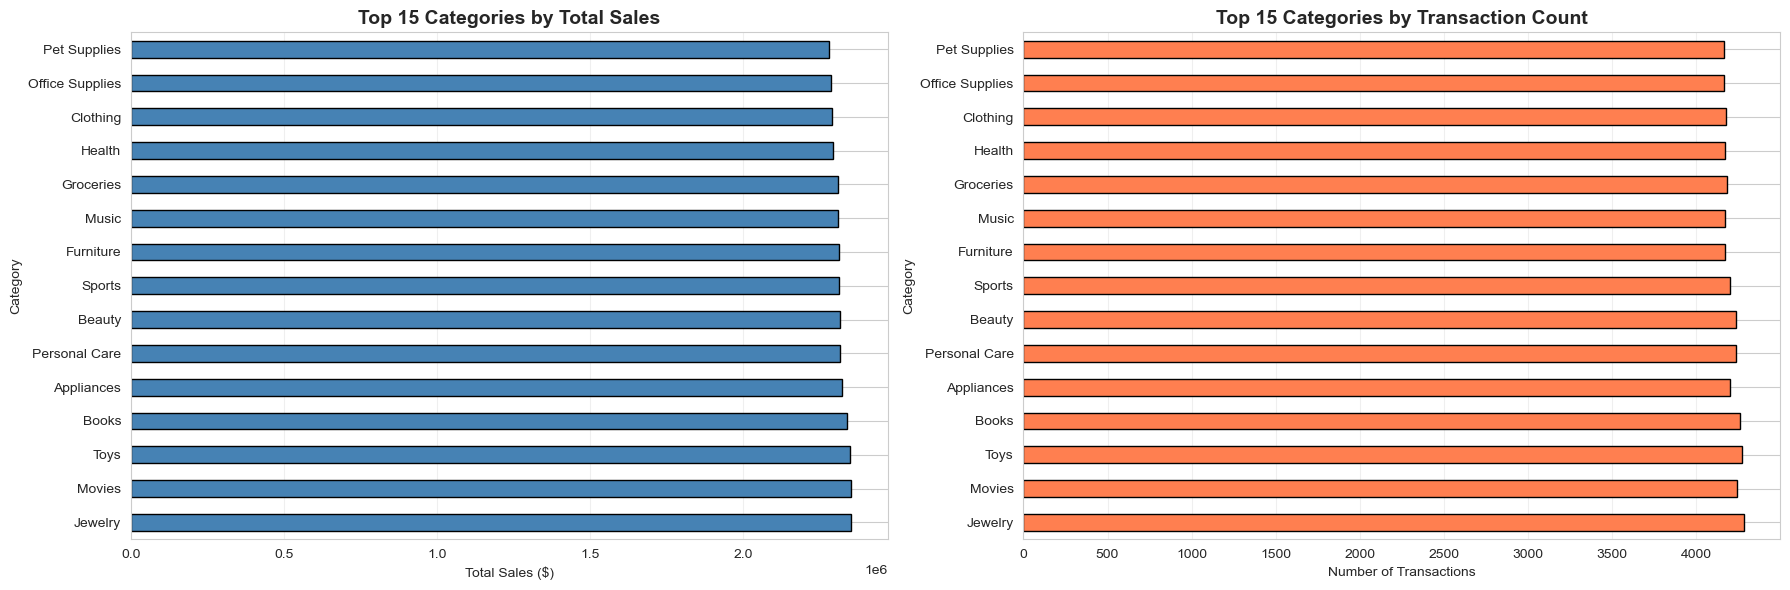


Top 10 Categories by Revenue:
  1. Jewelry: $2,354,701.50 (4284 transactions)
  2. Movies: $2,354,288.93 (4240 transactions)
  3. Toys: $2,349,300.44 (4273 transactions)
  4. Books: $2,339,331.42 (4259 transactions)
  5. Appliances: $2,322,231.10 (4203 transactions)
  6. Personal Care: $2,316,589.89 (4234 transactions)
  7. Beauty: $2,315,930.88 (4237 transactions)
  8. Sports: $2,312,741.97 (4198 transactions)
  9. Furniture: $2,312,543.98 (4169 transactions)
  10. Music: $2,311,180.65 (4170 transactions)


In [5]:
# 4. Product Category Analysis
if 'Product_Category' in cleaned_df.columns:
    print("\n4. Product Category Analysis")
    print("-" * 80)
    
    category_sales = cleaned_df.groupby('Product_Category')['Sales_Amount'].agg(['sum', 'count', 'mean']).sort_values('sum', ascending=False)
    
    fig, axes = plt.subplots(1, 2, figsize=(18, 6))
    
    # Total sales by category
    category_sales['sum'].head(15).plot(kind='barh', ax=axes[0], color='steelblue', edgecolor='black')
    axes[0].set_title('Top 15 Categories by Total Sales', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Total Sales ($)')
    axes[0].set_ylabel('Category')
    axes[0].grid(alpha=0.3, axis='x')
    
    # Number of transactions by category
    category_sales['count'].head(15).plot(kind='barh', ax=axes[1], color='coral', edgecolor='black')
    axes[1].set_title('Top 15 Categories by Transaction Count', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('Number of Transactions')
    axes[1].set_ylabel('Category')
    axes[1].grid(alpha=0.3, axis='x')
    
    plt.tight_layout()
    plt.show()
    
    print("\nTop 10 Categories by Revenue:")
    for idx, (category, row) in enumerate(category_sales.head(10).iterrows(), 1):
        print(f"  {idx}. {category}: ${row['sum']:,.2f} ({int(row['count'])} transactions)")


5. Sales Over Time Analysis
--------------------------------------------------------------------------------


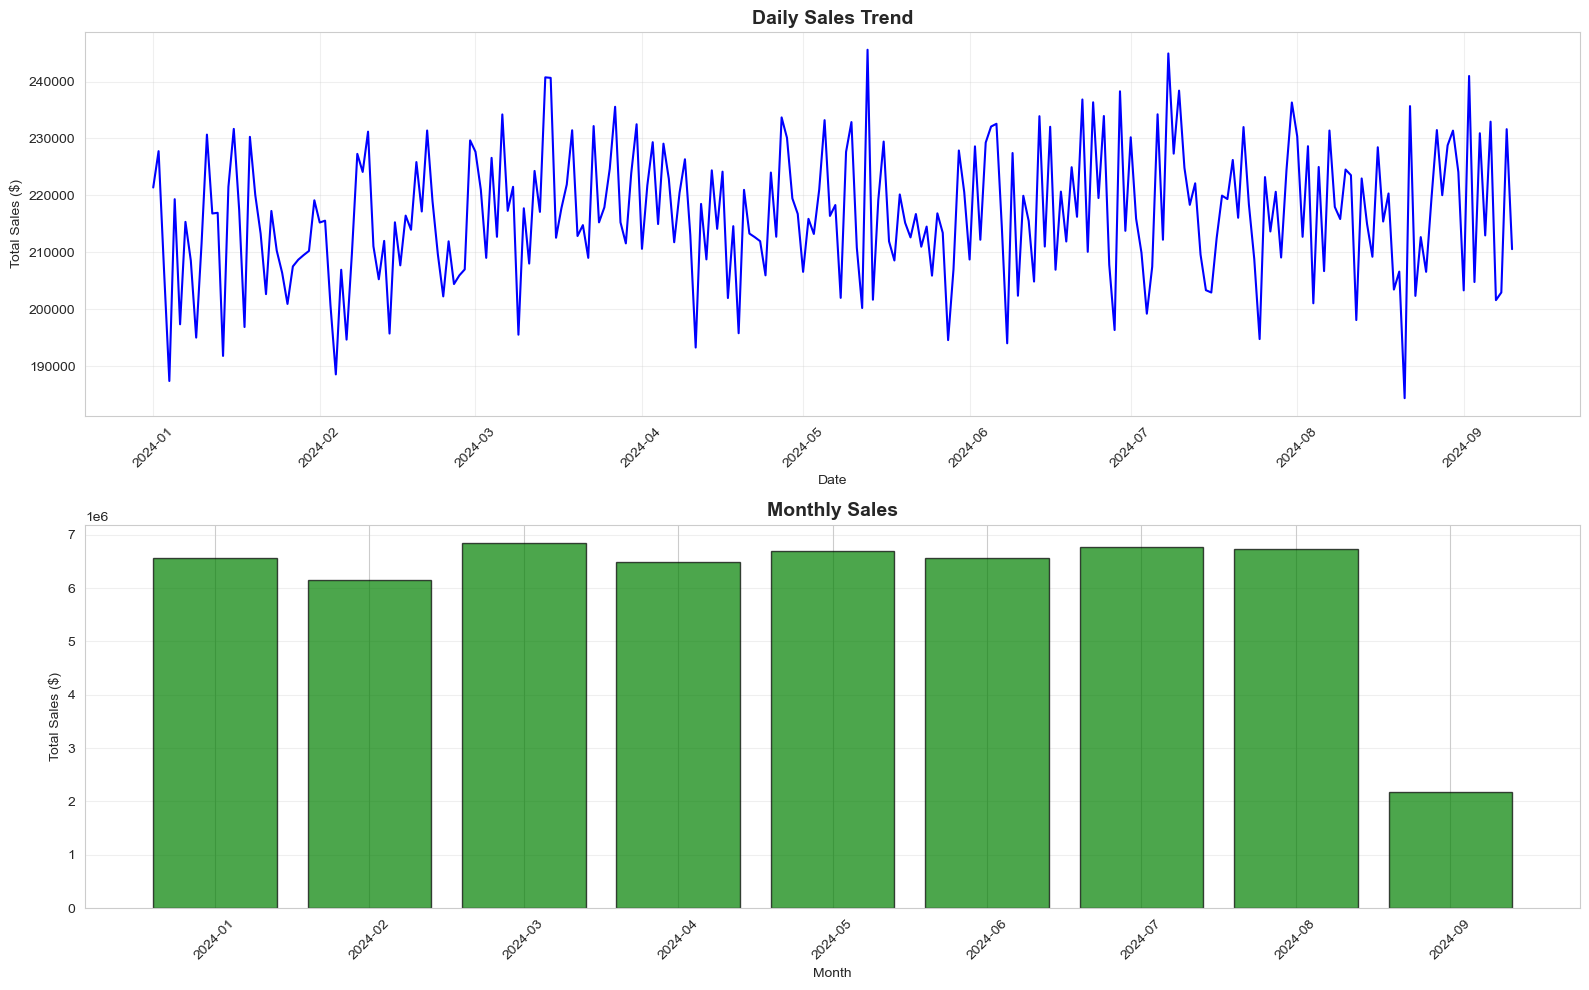

In [6]:
# 5. Sales Over Time
if 'Date_of_Sale' in cleaned_df.columns:
    print("\n5. Sales Over Time Analysis")
    print("-" * 80)
    
    # Group by date
    daily_sales = cleaned_df.groupby(cleaned_df['Date_of_Sale'].dt.date)['Sales_Amount'].sum().reset_index()
    daily_sales.columns = ['Date', 'Total_Sales']
    
    # Monthly sales
    cleaned_df['Month'] = cleaned_df['Date_of_Sale'].dt.to_period('M')
    monthly_sales = cleaned_df.groupby('Month')['Sales_Amount'].sum().reset_index()
    monthly_sales.columns = ['Month', 'Total_Sales']  
    monthly_sales['Month'] = monthly_sales['Month'].astype(str)
    
    fig, axes = plt.subplots(2, 1, figsize=(16, 10))
    
    # Daily sales trend
    axes[0].plot(daily_sales['Date'], daily_sales['Total_Sales'], color='blue', linewidth=1.5)
    axes[0].set_title('Daily Sales Trend', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Date')
    axes[0].set_ylabel('Total Sales ($)')
    axes[0].grid(alpha=0.3)
    axes[0].tick_params(axis='x', rotation=45)
    
    # Monthly sales
    axes[1].bar(monthly_sales['Month'], monthly_sales['Total_Sales'], color='green', edgecolor='black', alpha=0.7)
    axes[1].set_title('Monthly Sales', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('Month')
    axes[1].set_ylabel('Total Sales ($)')
    axes[1].grid(alpha=0.3, axis='y')
    axes[1].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()


6. Sales Region Analysis
--------------------------------------------------------------------------------


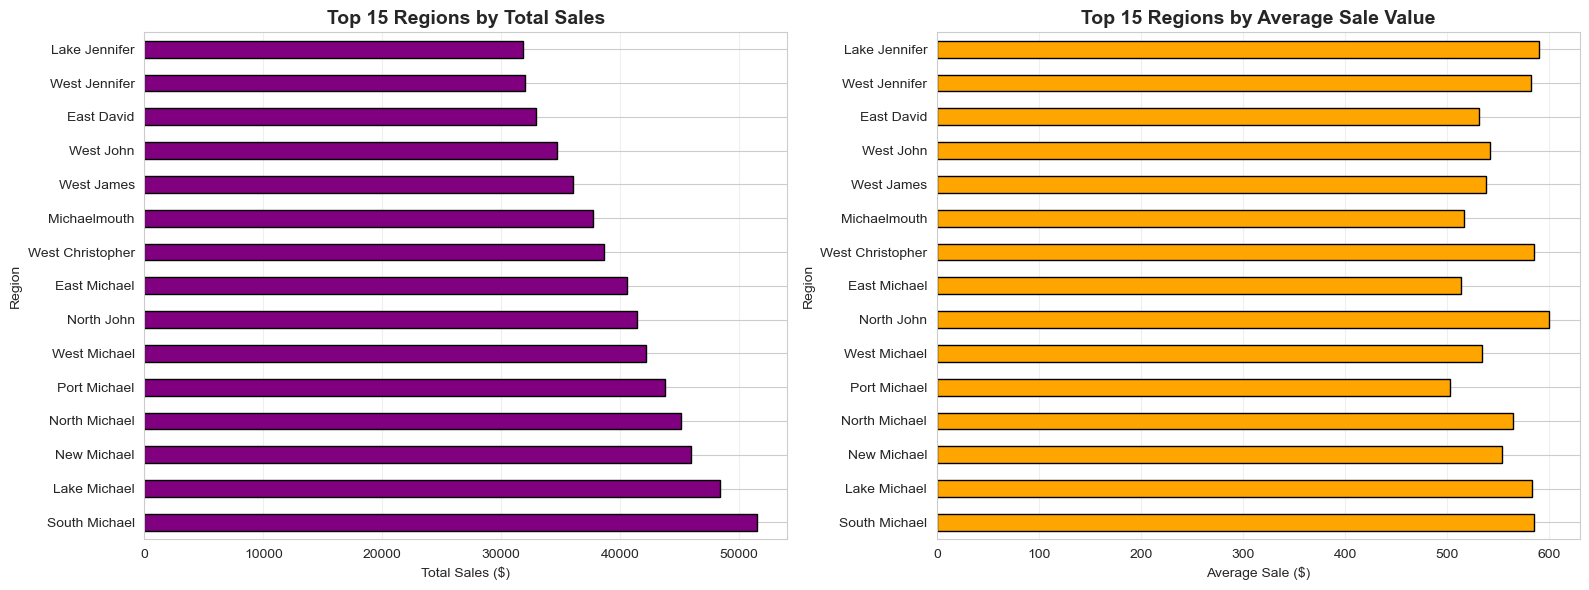

In [7]:
# 6. Sales Region Analysis
if 'Sales_Region' in cleaned_df.columns:
    print("\n6. Sales Region Analysis")
    print("-" * 80)
    
    region_sales = cleaned_df.groupby('Sales_Region')['Sales_Amount'].agg(['sum', 'count', 'mean']).sort_values('sum', ascending=False)
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Top regions by sales
    region_sales['sum'].head(15).plot(kind='barh', ax=axes[0], color='purple', edgecolor='black')
    axes[0].set_title('Top 15 Regions by Total Sales', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Total Sales ($)')
    axes[0].set_ylabel('Region')
    axes[0].grid(alpha=0.3, axis='x')
    
    # Average sale by region
    region_sales['mean'].head(15).plot(kind='barh', ax=axes[1], color='orange', edgecolor='black')
    axes[1].set_title('Top 15 Regions by Average Sale Value', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('Average Sale ($)')
    axes[1].set_ylabel('Region')
    axes[1].grid(alpha=0.3, axis='x')
    
    plt.tight_layout()
    plt.show()


7. Discount Analysis
--------------------------------------------------------------------------------


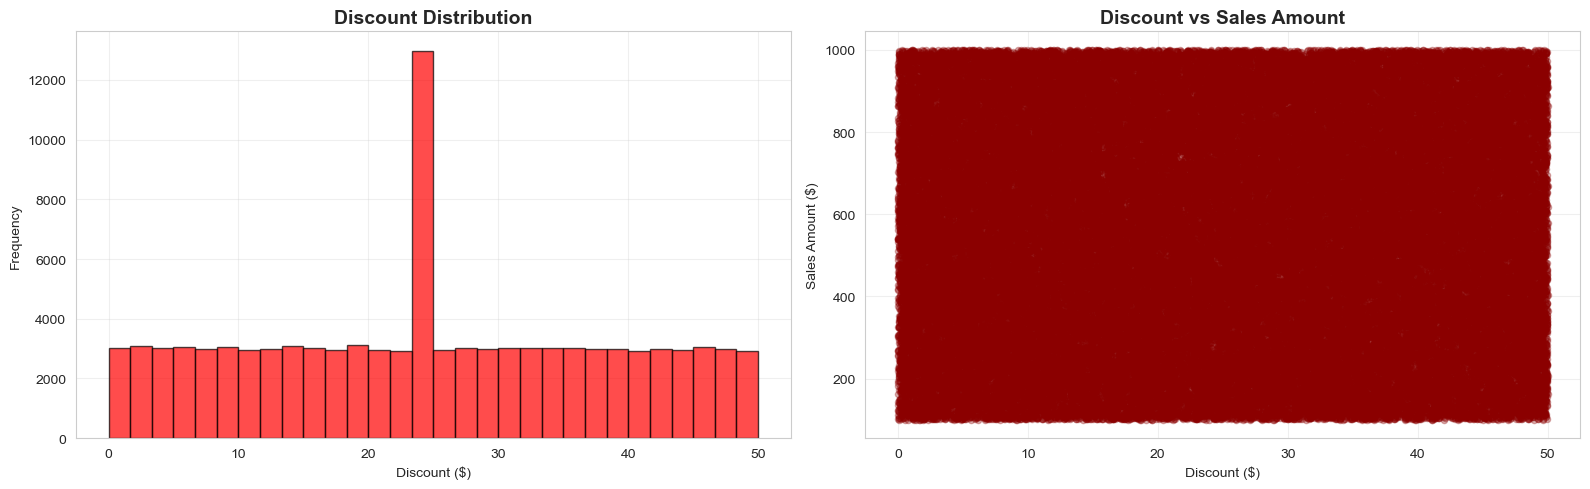


Discount Statistics:
  - Average Discount: $24.91
  - Total Discounts Given: $2,491,131.40
  - Discount as % of Sales: 4.53%


In [7]:
# 7. Discount Analysis
if 'Discount' in cleaned_df.columns:
    print("\n7. Discount Analysis")
    print("-" * 80)
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 5))
    
    # Discount distribution
    axes[0].hist(cleaned_df['Discount'], bins=30, color='red', edgecolor='black', alpha=0.7)
    axes[0].set_title('Discount Distribution', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Discount ($)')
    axes[0].set_ylabel('Frequency')
    axes[0].grid(alpha=0.3)
    
    # Discount vs Sales Amount
    axes[1].scatter(cleaned_df['Discount'], cleaned_df['Sales_Amount'], alpha=0.3, color='darkred', s=20)
    axes[1].set_title('Discount vs Sales Amount', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('Discount ($)')
    axes[1].set_ylabel('Sales Amount ($)')
    axes[1].grid(alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print("\nDiscount Statistics:")
    print(f"  - Average Discount: ${cleaned_df['Discount'].mean():.2f}")
    print(f"  - Total Discounts Given: ${cleaned_df['Discount'].sum():,.2f}")
    print(f"  - Discount as % of Sales: {(cleaned_df['Discount'].sum() / cleaned_df['Sales_Amount'].sum()) * 100:.2f}%")


8. Customer Demographics Analysis
--------------------------------------------------------------------------------


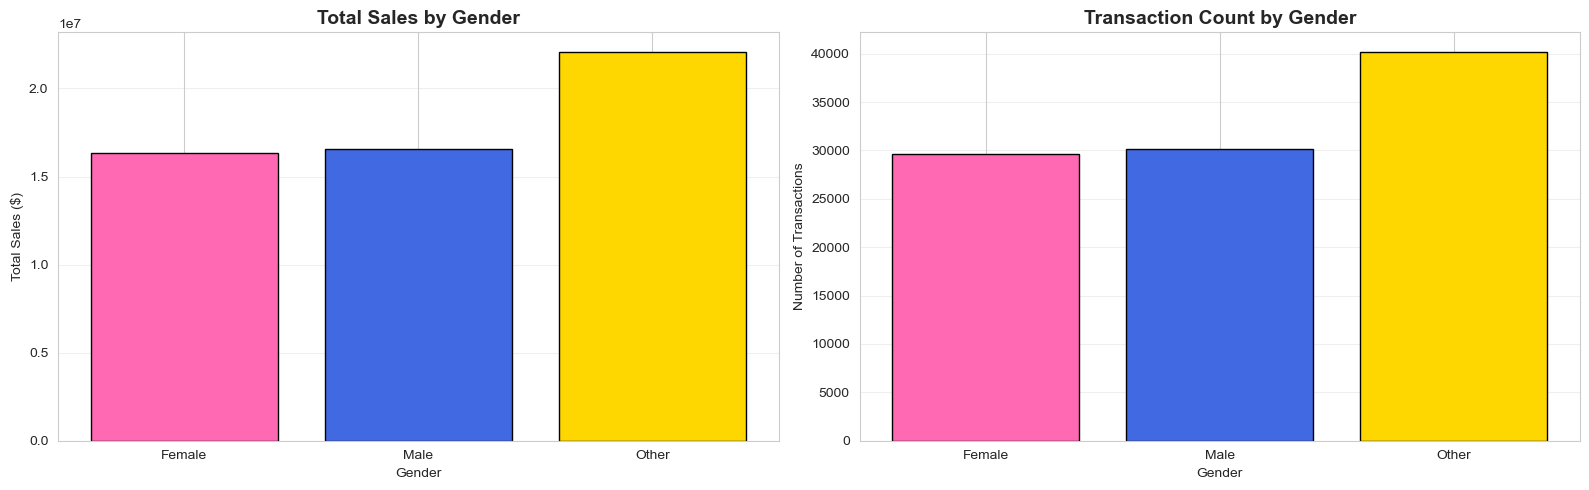

In [8]:
# 8. Customer Demographics
if 'Customer_Gender' in cleaned_df.columns:
    print("\n8. Customer Demographics Analysis")
    print("-" * 80)
    
    gender_sales = cleaned_df.groupby('Customer_Gender')['Sales_Amount'].agg(['sum', 'count', 'mean'])
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 5))
    
    # Sales by gender
    axes[0].bar(gender_sales.index, gender_sales['sum'], color=['#FF69B4', '#4169E1', '#FFD700'], edgecolor='black')
    axes[0].set_title('Total Sales by Gender', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Gender')
    axes[0].set_ylabel('Total Sales ($)')
    axes[0].grid(alpha=0.3, axis='y')
    
    # Transaction count by gender
    axes[1].bar(gender_sales.index, gender_sales['count'], color=['#FF69B4', '#4169E1', '#FFD700'], edgecolor='black')
    axes[1].set_title('Transaction Count by Gender', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('Gender')
    axes[1].set_ylabel('Number of Transactions')
    axes[1].grid(alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.show()


9. Customer Age Analysis
--------------------------------------------------------------------------------


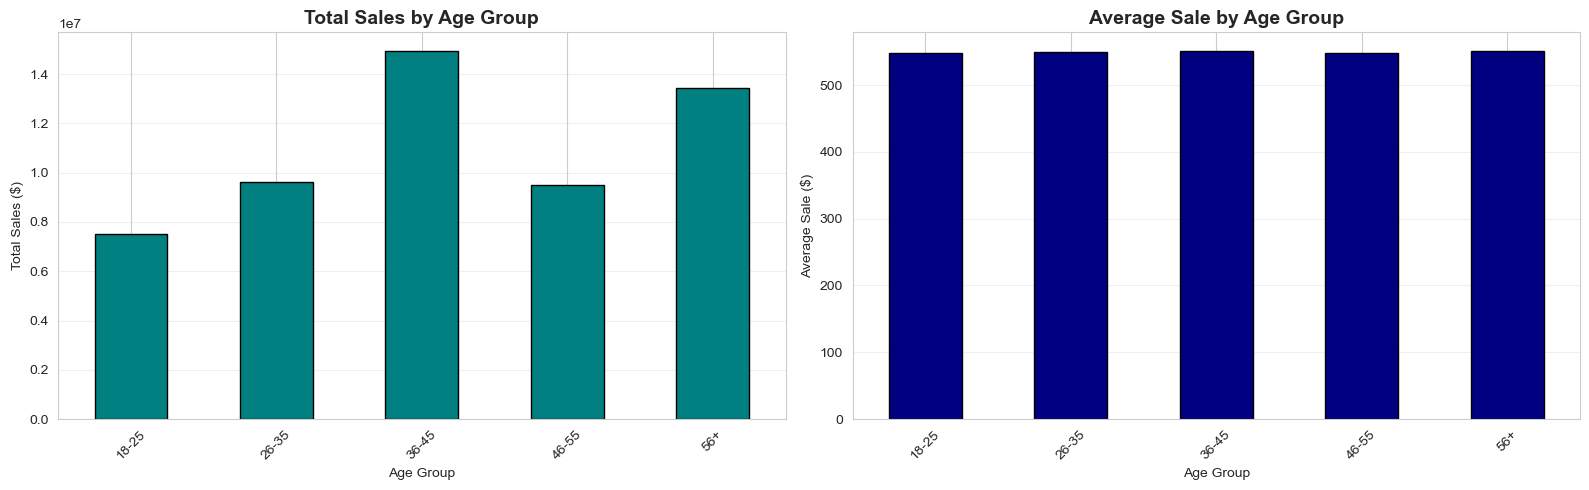

In [9]:
# 9. Customer Age Analysis
if 'Customer_Age' in cleaned_df.columns:
    print("\n9. Customer Age Analysis")
    print("-" * 80)
    
    # Create age groups
    cleaned_df['Age_Group'] = pd.cut(cleaned_df['Customer_Age'], 
                                      bins=[0, 25, 35, 45, 55, 100], 
                                      labels=['18-25', '26-35', '36-45', '46-55', '56+'])
    
    age_sales = cleaned_df.groupby('Age_Group')['Sales_Amount'].agg(['sum', 'count', 'mean'])
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 5))
    
    # Sales by age group
    age_sales['sum'].plot(kind='bar', ax=axes[0], color='teal', edgecolor='black')
    axes[0].set_title('Total Sales by Age Group', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Age Group')
    axes[0].set_ylabel('Total Sales ($)')
    axes[0].grid(alpha=0.3, axis='y')
    axes[0].tick_params(axis='x', rotation=45)
    
    # Average sale by age group
    age_sales['mean'].plot(kind='bar', ax=axes[1], color='navy', edgecolor='black')
    axes[1].set_title('Average Sale by Age Group', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('Age Group')
    axes[1].set_ylabel('Average Sale ($)')
    axes[1].grid(alpha=0.3, axis='y')
    axes[1].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()